<a href="https://colab.research.google.com/github/KelvinLam05/store_sales_prediction/blob/main/walmart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

The goal of this notebook is to create a sale prediction
model on the sales data of [Walmart supermarkets datasets](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting) provided by the Kaggle competition.

**Load the packages**

In [407]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Load the data**

In [408]:
features_df = pd.read_csv('/content/features.csv')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [409]:
stores_df = pd.read_csv('/content/stores.csv')
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [410]:
# Merging stores and features
stores_df = stores_df.merge(features_df, on = 'Store')
stores_df.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [411]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [412]:
# Merging train and stores
train_df = train_df.merge(stores_df, on = ['Store', 'Date', 'IsHoliday'])
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [413]:
# Rename Pandas columns to lower case
train_df.columns = train_df.columns.str.lower()

In [414]:
# Overview of all variables, their datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   dept          421570 non-null  int64  
 2   date          421570 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   isholiday     421570 non-null  bool   
 5   type          421570 non-null  object 
 6   size          421570 non-null  int64  
 7   temperature   421570 non-null  float64
 8   fuel_price    421570 non-null  float64
 9   markdown1     150681 non-null  float64
 10  markdown2     111248 non-null  float64
 11  markdown3     137091 non-null  float64
 12  markdown4     134967 non-null  float64
 13  markdown5     151432 non-null  float64
 14  cpi           421570 non-null  float64
 15  unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


**Changing a date string to a datetime**

To change a string or object data type to a datetime or datetime64[ns] data type we can use the Pandas to_datetime( ) function.

In [415]:
train_df['date'] = pd.to_datetime(train_df['date'])

To confirm that we have successfully completed our first step of converting our date string to a datetime, we can re-run info( ) and check that the Dtype column of the new date column is set to datetime64[ns]. Now this is in the right format, we can reformat it to a wide range of different date features.

In [416]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  int64         
 1   dept          421570 non-null  int64         
 2   date          421570 non-null  datetime64[ns]
 3   weekly_sales  421570 non-null  float64       
 4   isholiday     421570 non-null  bool          
 5   type          421570 non-null  object        
 6   size          421570 non-null  int64         
 7   temperature   421570 non-null  float64       
 8   fuel_price    421570 non-null  float64       
 9   markdown1     150681 non-null  float64       
 10  markdown2     111248 non-null  float64       
 11  markdown3     137091 non-null  float64       
 12  markdown4     134967 non-null  float64       
 13  markdown5     151432 non-null  float64       
 14  cpi           421570 non-null  float64       
 15  unemployment  421

**Engineer datetime features**

Basically we can break apart the date and get the leap year, quarter, and day_of_month.

In [417]:
train_df['leap_year'] = train_df['date'].dt.is_leap_year
train_df['quarter'] = train_df['date'].dt.quarter
train_df['day_of_month'] = train_df['date'].dt.day

In [418]:
# Drop the 'datetime' column
train_df = train_df.drop('date', axis = 1)

**Check for missing values**

In [419]:
# Return NaN for any non numeric value
train_df['markdown1'] = pd.to_numeric(train_df['markdown1'], errors = 'coerce')
train_df['markdown2'] = pd.to_numeric(train_df['markdown2'], errors = 'coerce')
train_df['markdown3'] = pd.to_numeric(train_df['markdown3'], errors = 'coerce')
train_df['markdown4'] = pd.to_numeric(train_df['markdown4'], errors = 'coerce')
train_df['markdown5'] = pd.to_numeric(train_df['markdown5'], errors = 'coerce')

Markdown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with a NaN.

In [420]:
train_df.isnull().sum()

store                0
dept                 0
weekly_sales         0
isholiday            0
type                 0
size                 0
temperature          0
fuel_price           0
markdown1       270889
markdown2       310322
markdown3       284479
markdown4       286603
markdown5       270138
cpi                  0
unemployment         0
leap_year            0
quarter              0
day_of_month         0
dtype: int64

**Split the training and test data**

Next we will split our dataset into the X feature set and the y target data, and we will use the train_test_split( ) function to create our test and training datasets.

In [421]:
from sklearn.model_selection import train_test_split

In [422]:
X = train_df.drop(['weekly_sales'], axis = 1) 

In [423]:
y = train_df['weekly_sales']

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Create a model pipeline**

In [425]:
import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [426]:
def get_pipeline(X, model):

    numeric_columns = list(X.select_dtypes(exclude = ['object']).columns.values.tolist())    
    categorical_columns = list(X.select_dtypes(include = ['object']).columns.values.tolist())
    numeric_transformer = SimpleImputer(strategy = 'constant', fill_value = 0)
    categorical_transformer = OneHotEncoder(drop = 'if_binary', sparse = False, handle_unknown = 'ignore')
    
    preprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, numeric_columns), ('categorical', categorical_transformer, categorical_columns)], remainder = 'passthrough')

    bundled_pipeline = imbpipeline(steps = [('preprocessor', preprocessor),
                                            ('scaler', RobustScaler()),
                                            ('model', model)])
    return bundled_pipeline

**Apply model selection**

To undertake the model selection step, we first need to create a dictionary containing the name of each model we want to test, and the name of the model class, i.e. XGBRegressor( ).

Next we will create a Pandas dataframe into which we will store the data. Then we will loop over each of the models, fit it using the X_train and y_train data, then generate predictions from X_test and calculate the mean R-squared from 5 rounds of cross-validation. That will give us the R-squared for the X_test data, plus the average R-squared for the training data set.

In [427]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [428]:
def select_model(X, y, pipeline = None):

  regressors = {}
  regressors.update({'XGBRegressor': XGBRegressor(objective = 'reg:squarederror', random_state = 42)})
  regressors.update({'LGBMRegressor': LGBMRegressor(random_state = 42)})
  regressors.update({'DecisionTreeRegressor': DecisionTreeRegressor(random_state = 42)})
  regressors.update({'ExtraTreeRegressor': ExtraTreeRegressor(random_state = 42)})
  regressors.update({'BaggingRegressor': BaggingRegressor(random_state = 42)})
  regressors.update({'GradientBoostingRegressor': GradientBoostingRegressor(random_state = 42)})
  regressors.update({'HistGradientBoostingRegressor': HistGradientBoostingRegressor(random_state = 42)})
  
  df_models = pd.DataFrame(columns = ['model', 'run_time', 'r2_score_cv', 'r2_score'])

  for key in regressors:

      print('*', key)

      start_time = time.time()
      
      pipeline = get_pipeline(X_train, regressors[key])

      cv = cross_val_score(pipeline, X, y, cv = 5, scoring = 'r2', n_jobs = -1)

      pipeline.fit(X_train, y_train)
      y_pred = pipeline.predict(X_test)

      row = {'model': key,
             'run_time': format(round((time.time() - start_time) / 60, 2)),
             'r2_score_cv': cv.mean(),
             'r2_score': r2_score(y_test, y_pred)}

      df_models = df_models.append(row, ignore_index = True)

  df_models = df_models.sort_values(by = 'r2_score', ascending = False)
      
  return df_models

Perhaps unsurprisingly, DecisionTreeRegressor came out on top.

In [429]:
models = select_model(X_train, y_train)

* XGBRegressor
* LGBMRegressor
* DecisionTreeRegressor
* ExtraTreeRegressor
* BaggingRegressor
* GradientBoostingRegressor
* HistGradientBoostingRegressor


In [430]:
models.head()

,model,run_time,r2_score_cv,r2_score
4,BaggingRegressor,2.77,0.954475,0.959445
2,DecisionTreeRegressor,0.58,0.922084,0.918547
1,LGBMRegressor,0.58,0.901011,0.897671
6,HistGradientBoostingRegressor,0.64,0.902002,0.897228
3,ExtraTreeRegressor,0.34,0.896120,0.886004


**Assess the top performing model**

Next, we will fit the the DecisionTreeRegressor(random_state = 42) model to the data using its default parameters and plot the performance of the predictions against the actual values. As you can see, this is already looking pretty good.

In [433]:
bundled_pipeline = get_pipeline(X_train, DecisionTreeRegressor(random_state = 42))
bundled_pipeline.fit(X_train, y_train)
y_pred = bundled_pipeline.predict(X_test)

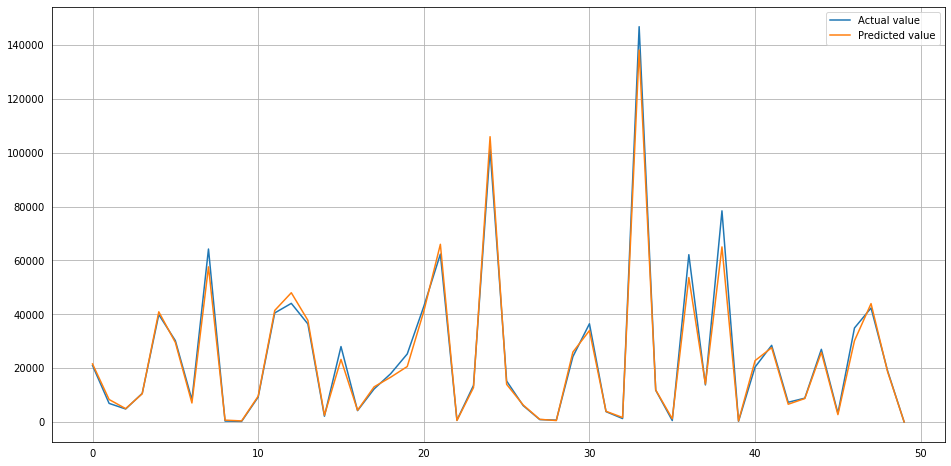

In [434]:
test = pd.DataFrame({'Predicted value': y_pred, 'Actual value': y_test})
fig = plt.figure(figsize = (16, 8))
test = test.reset_index()
test = test.drop(['index'], axis = 1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])
plt.tick_params(left = False, bottom = False)
plt.grid()